# Explore here

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
'''We need to extract just the useful columns from this data set represented as X, which includes the 
latitude, longitude, and the MedInc columns'''

X = total_data[['MedInc', 'Latitude', 'Longitude']]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [3]:
# Dividing the data set into a train and test

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

print(X_train.head())
print()
print(X_test.head())

       MedInc  Latitude  Longitude
14196  3.2596     32.71    -117.03
8267   3.8125     33.77    -118.16
17445  4.1563     34.66    -120.48
14265  1.9425     32.69    -117.11
2271   3.5542     36.78    -119.80

       MedInc  Latitude  Longitude
20046  1.6812     36.06    -119.01
3024   2.5313     35.14    -119.46
15663  3.4801     37.80    -122.44
20484  5.7376     34.28    -118.72
9814   3.7250     36.62    -121.93


In [4]:
'''Step 2: Build a K-Means. Classify the data into 6 clusters using the K-Means model. 
Then store the cluster to which each house belongs as a new column in the dataset. 
You could call it cluster. To introduce it to your dataset you may have to categorize 
it. See what format and values it has and act accordingly. Plot it in a dot plot and
describe what you see.'''

from sklearn.cluster import KMeans

unsupervised_ds = KMeans(n_clusters=6, n_init='auto', random_state=42)
unsupervised_ds.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [5]:
# Insertion of clusters into the training dataset

y_train = list(unsupervised_ds.labels_)
X_train['Cluster'] = y_train
X_train.head()

,MedInc,Latitude,Longitude,Cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


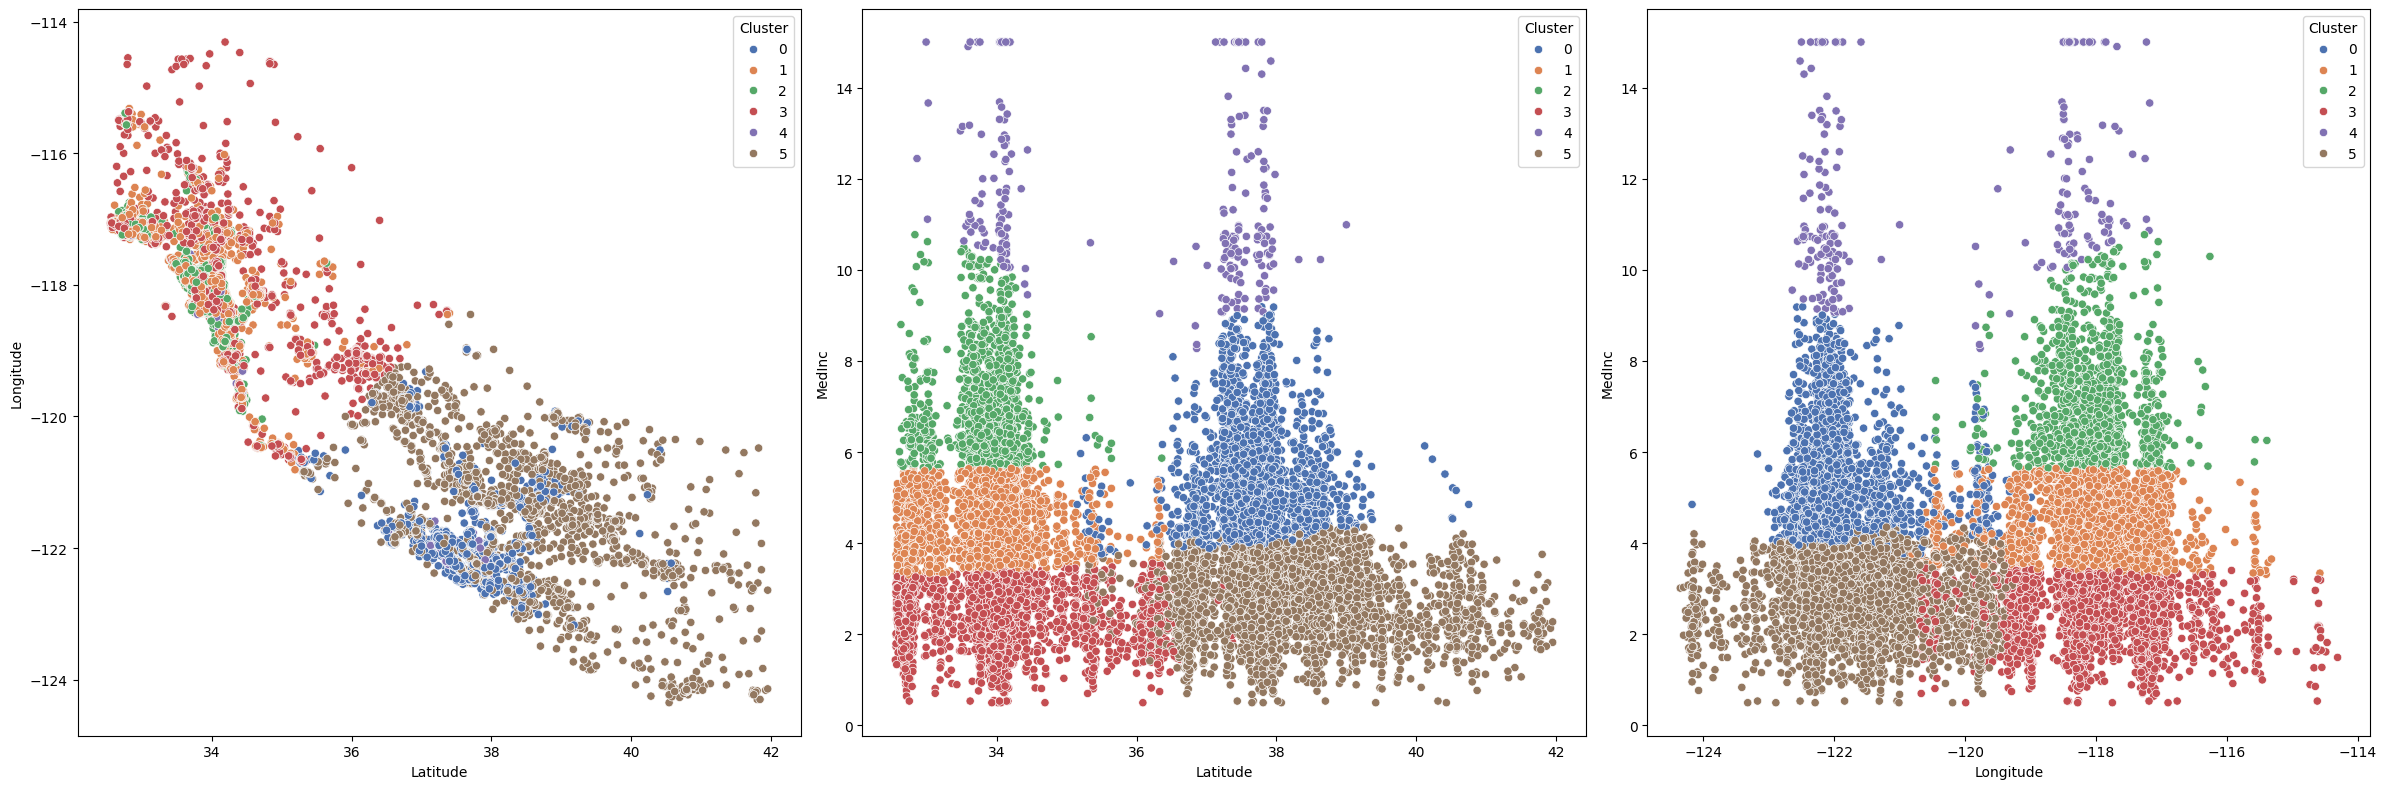

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a scatterplot showing the relationship between Latitude, Longitude, and the median income.

fig, axis = plt.subplots(1, 3, figsize = (24, 8))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep")
plt.tight_layout()

plt.show()


Looking at the plot above, we can obviously recognize the state of California being represented in the first plot showing the concentration of data points near San Francisco & Los Angeles regions.  Analyzing the median income clusters in relation to the location in the state, as you venture inland, the median income is reduced, having a higher concentration of income along the coast.

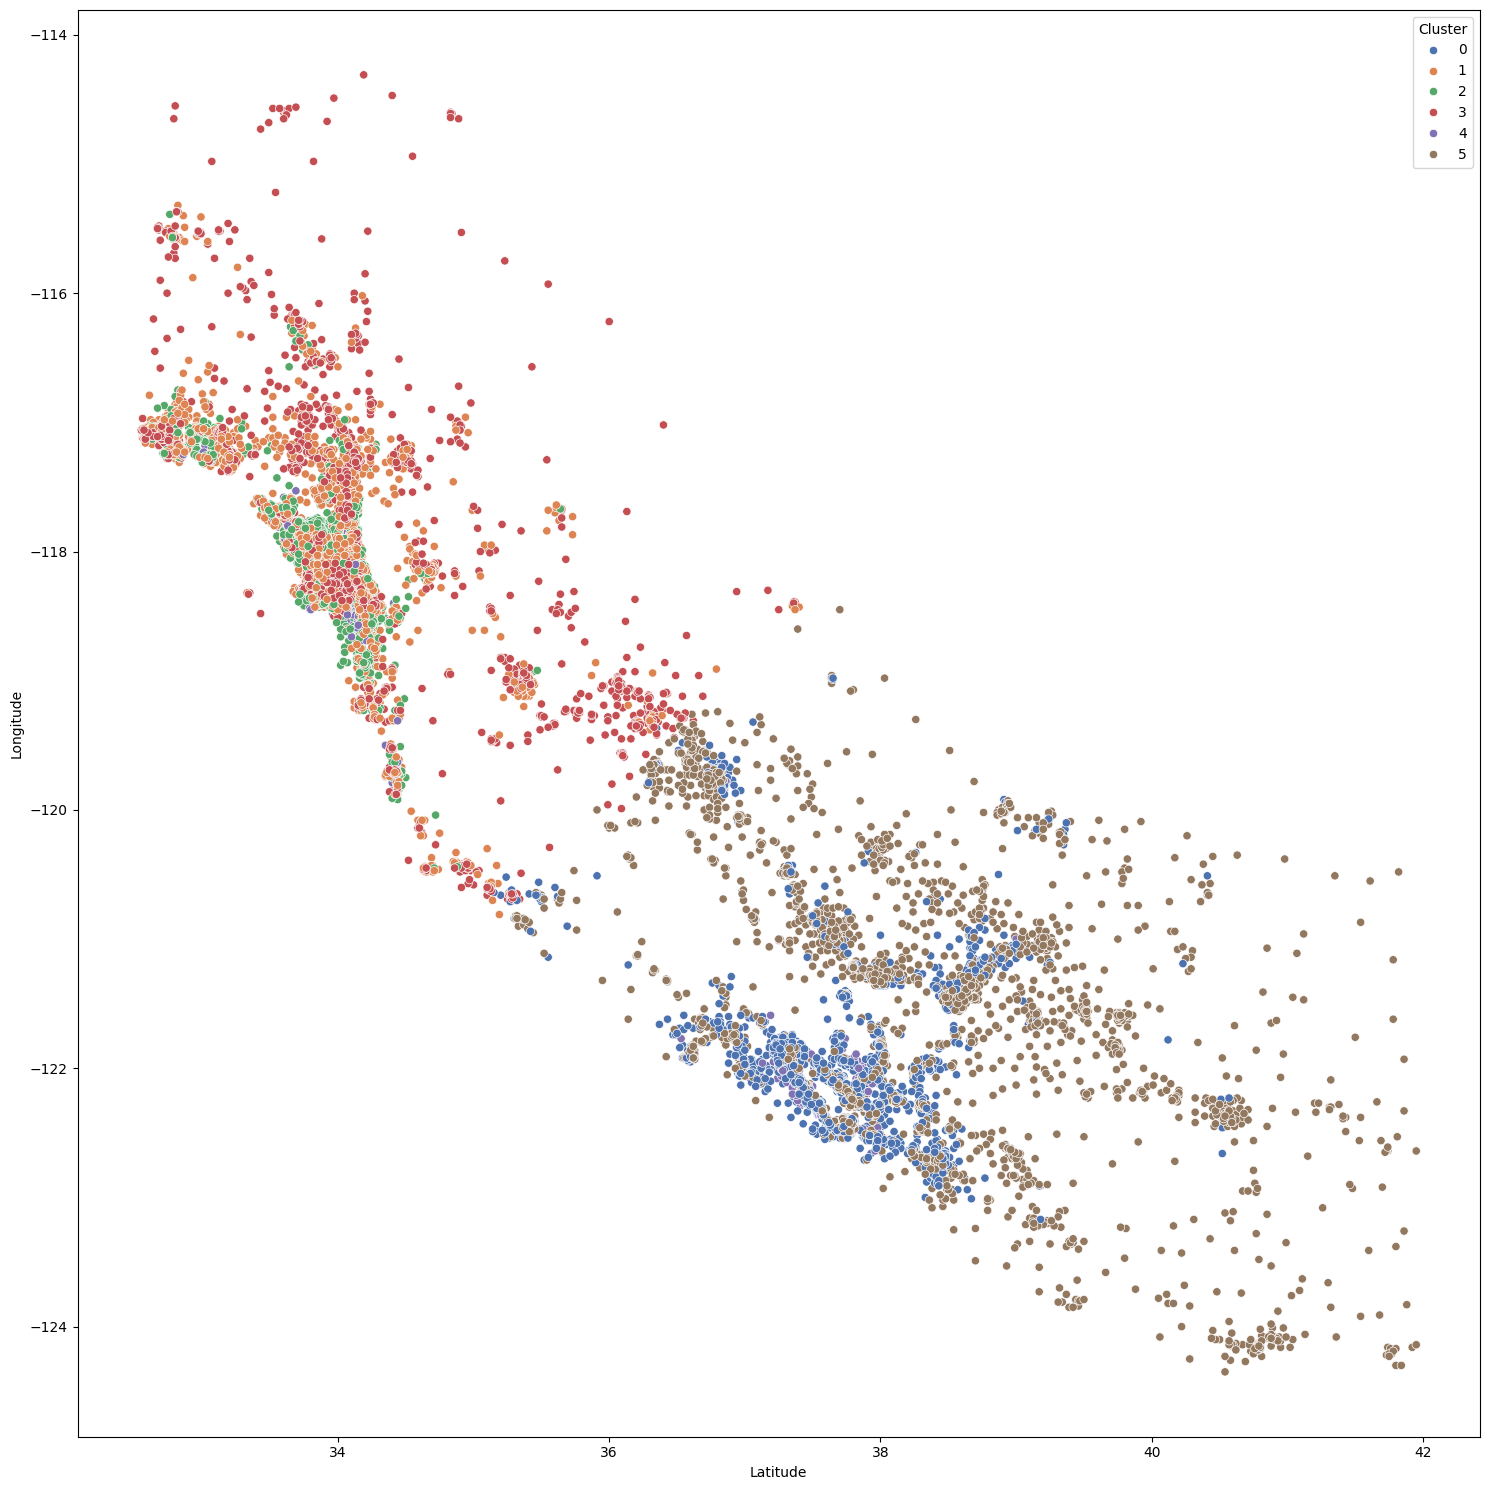

In [7]:
# Wanted to get a more precise look at where the median incomes were concentrated and also find where the Cluster 4 (violet) existed on the plot.
fig, axis = plt.subplots(1, 1, figsize=(15, 15))
sns.scatterplot(ax = axis, data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep")
plt.tight_layout()
plt.show()

In [8]:
# Making a prediction across the test set

y_test = list(unsupervised_ds.predict(X_test))
X_test["Cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,Cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


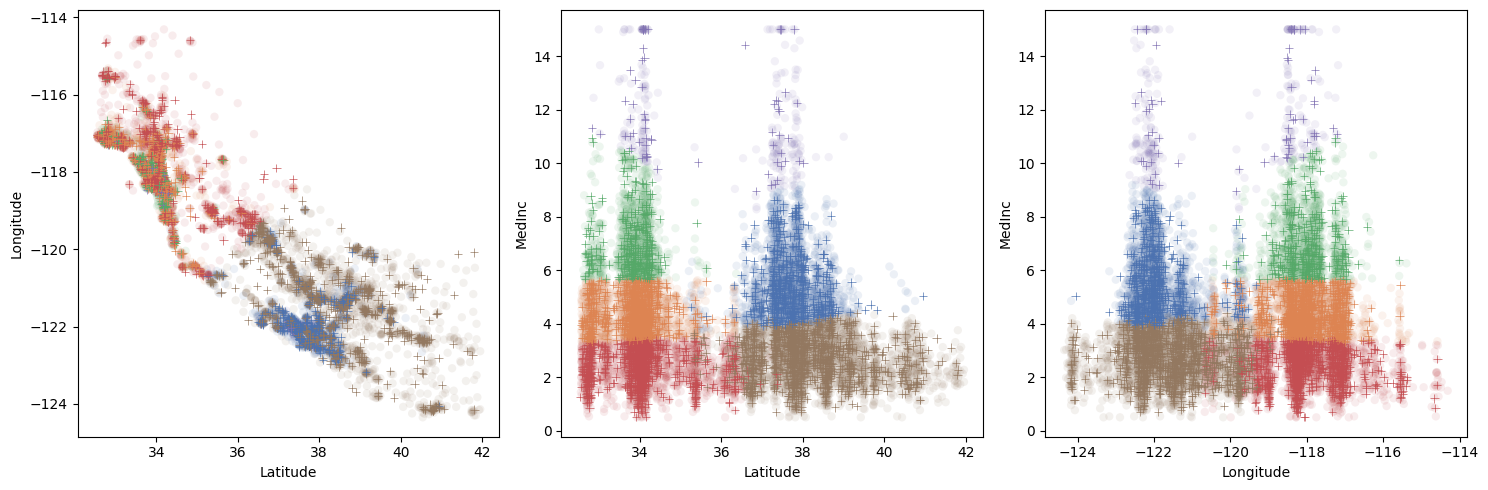

In [9]:
# Plotting for the test results to compare against the training plots above

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

In [10]:
X_train = X_train.drop(columns='Cluster')
X_test = X_test.drop(columns='Cluster')

We can easily detect that the clusters have a high reliability between the train and test data point amongst clusters between the hues and cross markings correlated between each respective cluster.

In [11]:
'''Step 4: Train a supervised classification model
Now that K-Means has returned a categorization (clustering) of the points for the training and test sets, study which 
model might be most useful and train it. Get the statistics and describe what you see.'''

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf_model.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9963662790697675